In [3]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score, accuracy_score
import seaborn as sbn
import matplotlib.pyplot as plt

### Metrics on Predicate Detection

ACCURACY : 0.9865104166666666
F1 SCORE:  0.7934060090401488
RECALL :  0.7819706498951782
PRECISION :  0.8051807879114948
ROC AUC :  0.8877442849418432


array([[55331,   361],
       [  416,  1492]])

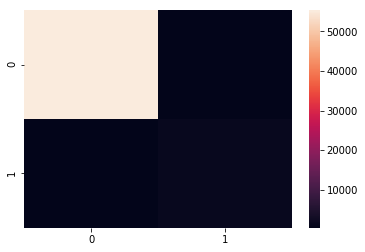

In [17]:
predicate_detection_eval = np.load("./predictions_actual/predicate_detection_eval.npy")
predicate_real_pos = np.load("./predictions_actual/predicate_real_pos_eval.npy")

y_true, y_pre = predicate_real_pos.flatten(), predicate_detection_eval.flatten()

print("ACCURACY :", accuracy_score(y_true, y_pre))
print("F1 SCORE: ",f1_score(y_true, y_pre))
print("RECALL : ",recall_score(y_true, y_pre))
print("PRECISION : ",precision_score(y_true, y_pre))
print("ROC AUC : ",roc_auc_score(y_true, y_pre))
sbn.heatmap(confusion_matrix(y_true, y_pre))
confusion_matrix(y_true, y_pre)

## Metrics for Predicate Disambiguation

ACCURACY : 0.7389937106918238
F1 SCORE (weighted):  0.7416578320526401
F1 SCORE (not weighted by frequency just mean):  0.4565355888566692
RECALL (weighted):  0.7389937106918238
RECALL (not weighted by frequency just mean):  0.46644697866548834
PRECISION (weighted):  0.775082715803674
PRECISION (not weighted by frequency just mean):  0.46810158211913383


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  're

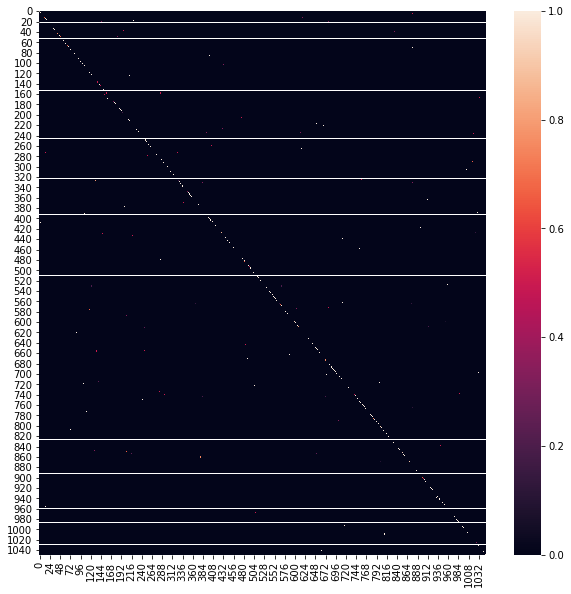

In [18]:
predicate_disambiguation_eval = np.load("./predictions_actual/predicate_disambiguation_eval.npy")
predicate_real_sense_eval = np.load("./predictions_actual/predicate_real_sense_eval.npy")
y_true, y_pre = predicate_disambiguation_eval[predicate_real_pos==1], predicate_real_sense_eval[predicate_real_pos==1]

print("ACCURACY :", accuracy_score(y_true, y_pre))
print("F1 SCORE (weighted): ",f1_score(y_true, y_pre, average="weighted"))
print("F1 SCORE (not weighted by frequency just mean): ",f1_score(y_true, y_pre, average="macro"))
print("RECALL (weighted): ",recall_score(y_true, y_pre, average="weighted"))
print("RECALL (not weighted by frequency just mean): ",recall_score(y_true, y_pre, average="macro"))
print("PRECISION (weighted): ",precision_score(y_true, y_pre, average="weighted"))
print("PRECISION (not weighted by frequency just mean): ",precision_score(y_true, y_pre, average="macro"))

cm = confusion_matrix(y_true, y_pre)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sbn.heatmap(cm)

## Semantic Role Labeling metrics

In [4]:
arg_pred = np.load("./predictions_srl/argument_eval.npy")
arg_real = np.load("./predictions_srl/arg_real_eval.npy")
arg_real = np.reshape(arg_real, (100,26,-1))
pred_counts = np.load("./predictions_srl/pred_count_eval.npy")
sequence_len = np.load("./predictions_srl/sequence_len_eval.npy")

In [5]:
take_pred = []
take_real = []
for i in range(arg_pred.shape[0]):
    take_pred.extend(arg_pred[i,:pred_counts[i],:sequence_len[i]].flatten().tolist())
    take_real.extend(arg_real[i,:pred_counts[i],:sequence_len[i]].flatten().tolist())

ACCURACY : 0.9927179934026265
F1 SCORE (weighted):  0.9963456913514696
F1 SCORE (not weighted by frequency just mean):  0.07116754938224783
RECALL (weighted):  0.9927179934026265
RECALL (not weighted by frequency just mean):  0.0709084281001876
PRECISION (weighted):  1.0
PRECISION (not weighted by frequency just mean):  0.07142857142857142


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn

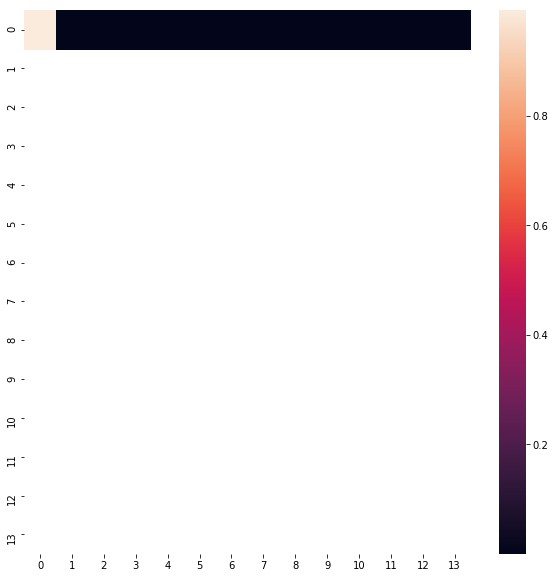

In [6]:
y_true, y_pre = np.array(take_real), np.array(take_pred)

print("ACCURACY :", accuracy_score(y_true, y_pre))
print("F1 SCORE (weighted): ",f1_score(y_true, y_pre, average="weighted"))
print("F1 SCORE (not weighted by frequency just mean): ",f1_score(y_true, y_pre, average="macro"))
print("RECALL (weighted): ",recall_score(y_true, y_pre, average="weighted"))
print("RECALL (not weighted by frequency just mean): ",recall_score(y_true, y_pre, average="macro"))
print("PRECISION (weighted): ",precision_score(y_true, y_pre, average="weighted"))
print("PRECISION (not weighted by frequency just mean): ",precision_score(y_true, y_pre, average="macro"))

cm = confusion_matrix(y_true, y_pre)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sbn.heatmap(cm)

In [7]:
i = 5
arg_pred[i,:pred_counts[i],:sequence_len[i]].shape, pred_counts[i], sequence_len[i]

((9, 49), 9, 49)

This is the bug my model is just putting all arguments to "unk" but this is not ok

In [9]:
arg_pred[i,:pred_counts[i],:sequence_len[i]].flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,